# Preprocessing

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
#Remove irrelevent features, fill NaN, reset index, set dtypes
titanic = pd.read_csv('titanic_train.csv')

#Set index
titanic = titanic.set_index('PassengerId')

#Split name into Surname and Title for family tracking
titanic['Name_Mod'] = titanic.Name.apply(lambda x: x.split())
titanic['Surname'] = titanic.Name_Mod.apply(lambda x: x[0][:-1])
titanic['Title'] = titanic.Name_Mod.apply(lambda x: x[1])
titanic = titanic.drop(['Ticket', 'Name', 'Name_Mod', 'Cabin'], axis = 1)

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Surname     891 non-null object
Title       891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


Many missing values in the age and cabin categories. We will need to impute thes values to provide useful classification. 

## Missing Data


In [3]:
# drop the NaN Values. (Could find a way to impute, but that is an exercise for another day)
titanic  = titanic.dropna()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 10 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
Surname     712 non-null object
Title       712 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


## Encoding Categorical Variables

In [4]:
#Change categorical variables to integers
from sklearn.preprocessing import LabelEncoder

#Sex
le_sex = LabelEncoder()
sex_numeric = le_sex.fit_transform(titanic.Sex)
sex_numeric_classes = le_sex.classes_

#Embarked
le_embarked = LabelEncoder()
embarked_numeric = le_embarked.fit_transform(titanic.Embarked)
embarked_numeric_classes = le_embarked.classes_


print('Sex Numeric Feature:','\n', np.arange(len(sex_numeric_classes)),'\n', sex_numeric_classes)
print()
print('Embarked Numeric Feature','\n', np.arange(len(embarked_numeric_classes)),'\n', embarked_numeric_classes)

Sex Numeric Feature: 
 [0 1] 
 ['female' 'male']

Embarked Numeric Feature 
 [0 1 2] 
 ['C' 'Q' 'S']


In [5]:
titanic = pd.get_dummies(titanic)

## StandardScaler

In [6]:
#dropping the Names
titanic = titanic.iloc[:,:8]
titanic_scaled = titanic.copy()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
q = sc.fit_transform(titanic_scaled.loc[:,['Age', 'Fare']])
titanic_scaled['Age']= q[:, 0]
titanic_scaled['Fare'] = q[:,1]
titanic_scaled.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,,
1,0,3,-0.527669,1,0,-0.516380,0,1
2,1,1,0.577094,1,0,0.694046,1,0
3,1,3,-0.251478,0,0,-0.503620,1,0
4,1,1,0.369951,1,0,0.350326,1,0
5,0,3,0.369951,0,0,-0.501257,0,1


## Identify Outliers


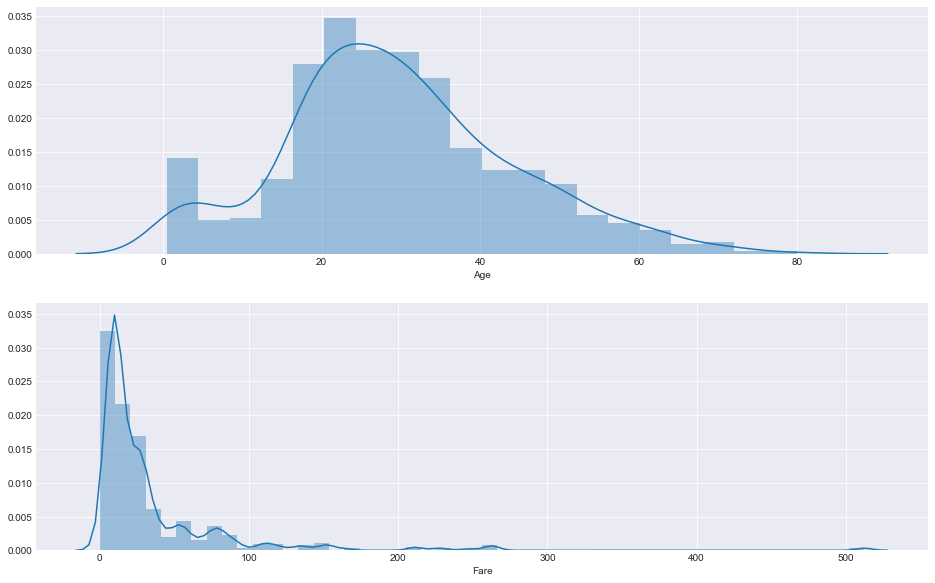

In [7]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(2,1, figsize = (16,10))
sns.distplot(titanic.Age, ax = axes[0])
sns.distplot(titanic.Fare, ax = axes[1])



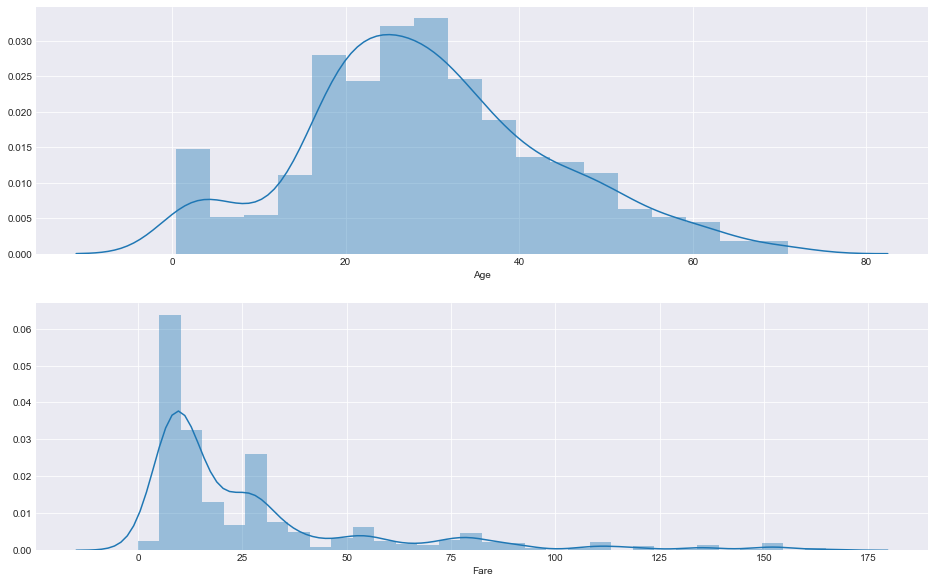

In [8]:
from scipy import stats
OutTitanic = titanic[(np.abs(stats.zscore(titanic[['Age','Fare']])) < 3).all(axis=1)]

fig, axes = plt.subplots(2,1, figsize = (16,10))
sns.distplot(OutTitanic.Age, ax = axes[0])
sns.distplot(OutTitanic.Fare, ax = axes[1])

In [9]:
OutTitanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 1 to 891
Data columns (total 8 columns):
Survived      692 non-null int64
Pclass        692 non-null int64
Age           692 non-null float64
SibSp         692 non-null int64
Parch         692 non-null int64
Fare          692 non-null float64
Sex_female    692 non-null uint8
Sex_male      692 non-null uint8
dtypes: float64(2), int64(4), uint8(2)
memory usage: 39.2 KB
